## Simple Autoencoder for PCA

### Tensor Flow

    ## Udemy Exercises

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

    ## create some data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=500, n_features=3, centers=2, random_state=20)

In [4]:
data

(array([[ 2.14532622,  5.85002373,  8.4419108 ],
        [ 1.65680297,  9.96417617,  7.84184593],
        [ 5.69548012, -9.94122002,  2.71348077],
        ..., 
        [ 0.10724544,  9.0684756 ,  7.40981895],
        [ 6.12651165, -9.46194461,  3.81354221],
        [ 2.11110489,  8.40339271,  6.71587397]]),
 array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 

    ## Scale Data

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
# scaling features from the data
scaled_data = scaler.fit_transform(data[0])

In [8]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [9]:
from mpl_toolkits.mplot3d import Axes3D

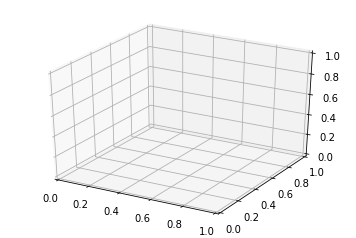

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

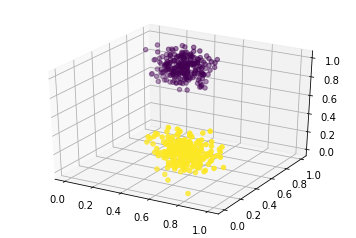

In [11]:
# Let's add data on it
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

## Linear Autoencoder

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.contrib.layers import fully_connected

In [15]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

learning_rate = 0.05

## Placeholder

In [16]:
# No label - Just X
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

## Layers

In [17]:
# No activation function required
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

## Loss Function

In [18]:
loss = tf.reduce_mean(tf.square(outputs - X))

## Optimizer

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

## Initializer

In [20]:
init = tf.global_variables_initializer()

## Running Session

In [21]:
num_steps = 100

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    
    output_2d = hidden.eval(feed_dict={X:scaled_data})

In [22]:
output_2d.shape

(500, 2)

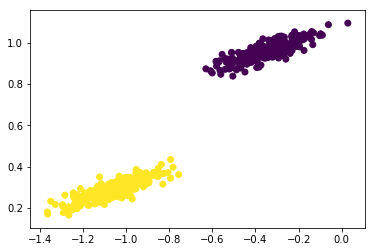

In [23]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])

## Linear Autoencoder for PCA 

    ## Tensor Flow - Udemy exercise

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

    ## Using data set provided during Udemy course -

In [26]:
df = pd.read_csv('C:\\Users\\Rakib\\Downloads\\Completed Projects -- Machine Learning IBM\\Tensorflow-Bootcamp\\05-Autoencoders\\anonymized_data.csv')

In [27]:
df.columns

Index(['EJWY', 'VALM', 'EGXO', 'HTGR', 'SKRF', 'NNSZ', 'NYLC', 'GWID', 'TVUT',
       'CJHI', 'NVFW', 'VLBG', 'IDIX', 'UVHN', 'IWOT', 'LEMB', 'QMYY', 'XDGR',
       'ODZS', 'LNJS', 'WDRT', 'LKKS', 'UOBF', 'VBHE', 'FRWU', 'NDYZ', 'QSBO',
       'JDUB', 'TEVK', 'EZTM', 'Label'],
      dtype='object')

In [28]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

## Scale Feature Columns

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaled_data = scaler.fit_transform(df.drop('Label', axis=1))

## Linear Autoencoder

In [33]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [34]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs 

learning_rate = 0.01 

## Placeholder 

In [35]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

## Layers 

In [36]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

## Loss Function

In [37]:
loss = tf.reduce_mean(tf.square(outputs - X))

## Optimizer

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

## Initializer

In [39]:
init = tf.global_variables_initializer()

## Session

In [55]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:scaled_data})

In [56]:
# use the scaled data
with tf.Session() as sess:
    sess.run(init)
    
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [57]:
# shape of the output
output_2d.shape

(500, 2)

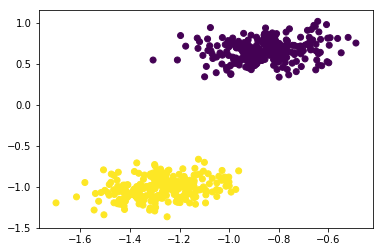

In [58]:
# plot the 2d data
plt.scatter(output_2d[:,0], output_2d[:,1], c=df["Label"])